<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сборный-проект" data-toc-modified-id="Сборный-проект-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Сборный проект</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Извлечение-данных" data-toc-modified-id="Извлечение-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Извлечение данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)" data-toc-modified-id="столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</a></span></li><li><span><a href="#Матрица-корреляции" data-toc-modified-id="Матрица-корреляции-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Матрица корреляции</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Обучении-модели-кластеризации-на-основании-алгоритма-K-Means" data-toc-modified-id="Обучении-модели-кластеризации-на-основании-алгоритма-K-Means-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Обучении модели кластеризации на основании алгоритма K-Means</a></span></li><li><span><a href="#Среднее-значение-признаков-для-кластеров" data-toc-modified-id="Среднее-значение-признаков-для-кластеров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Среднее значение признаков для кластеров</a></span></li></ul></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

# Сборный проект

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов

# Знакомство с данными

## Импорт библиотек

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
import scipy.stats as stats
pd.set_option("max_colwidth", 1)
from pandas.plotting import register_matplotlib_converters
import plotly.express as px

## Извлечение данных

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
df.duplicated().sum()

0

Пропущенных значений не наблюдается.

Всего 4000 строк данных.

14 колонок

Дубликатов нет

# Исследовательский анализ данных (EDA)

In [6]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Только два показателя равны для средних значений для тех, кто остался и тех, кто ушел.
Это пол и наличие контактного телефона.
В остальных случаях все показатели выше для тех, кто остался.

## столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

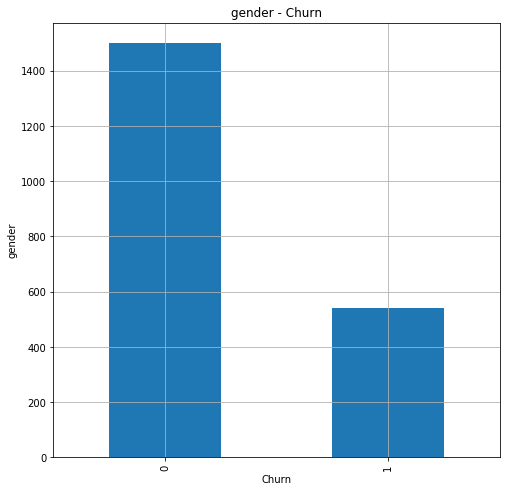

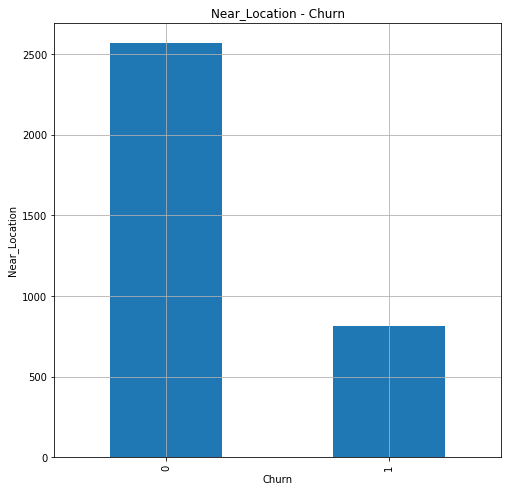

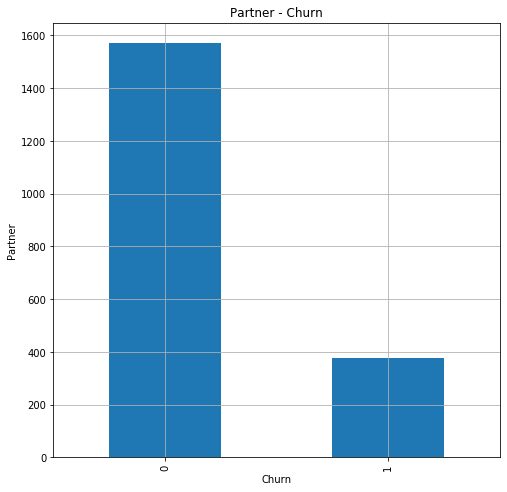

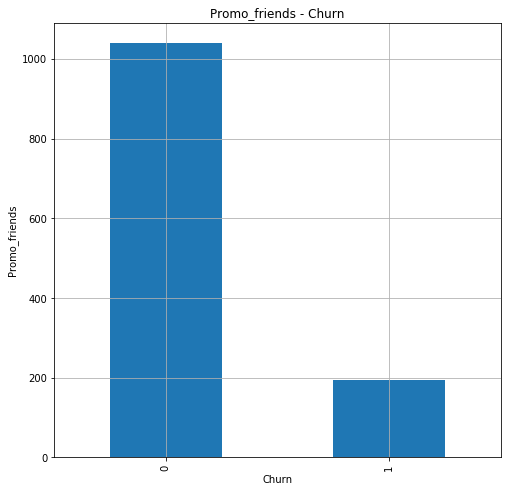

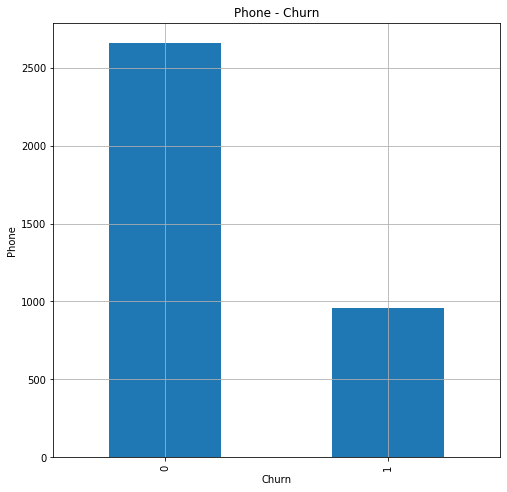

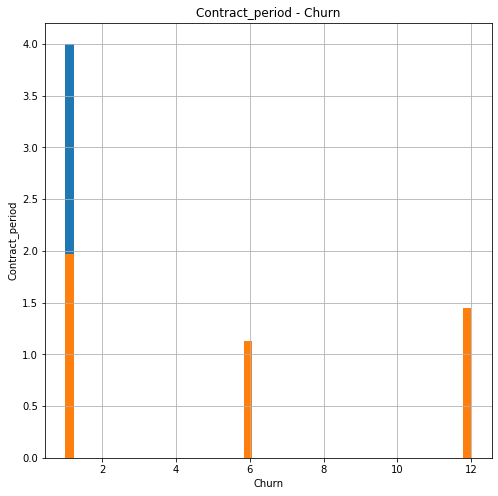

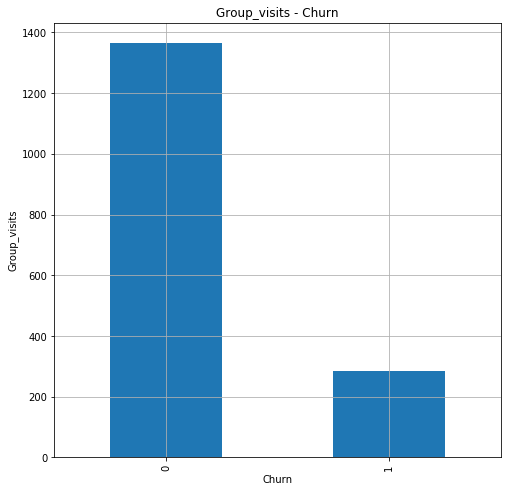

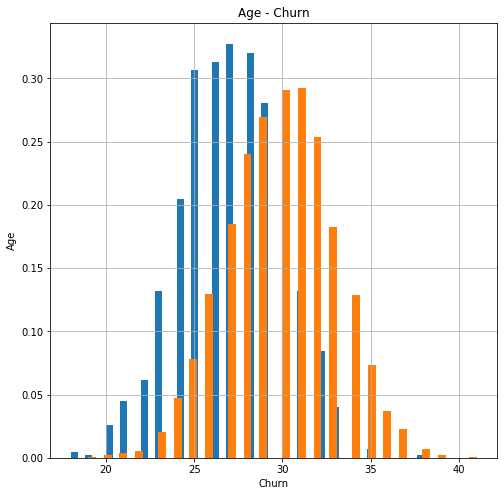

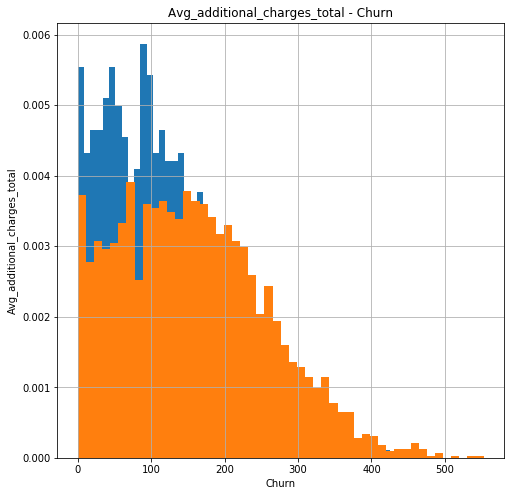

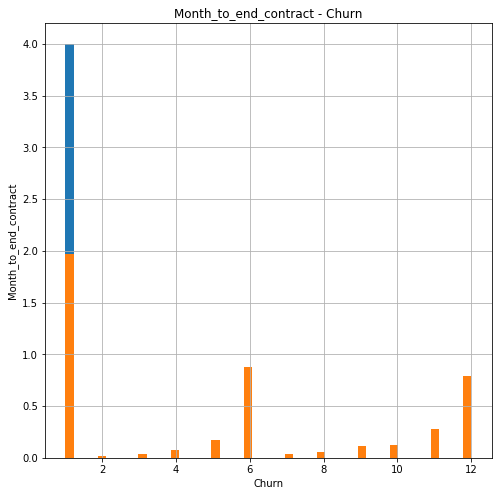

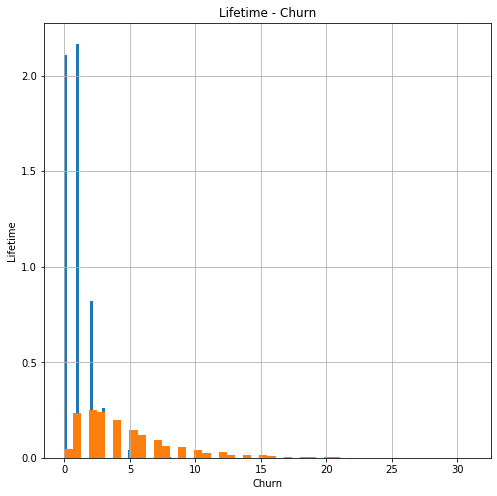

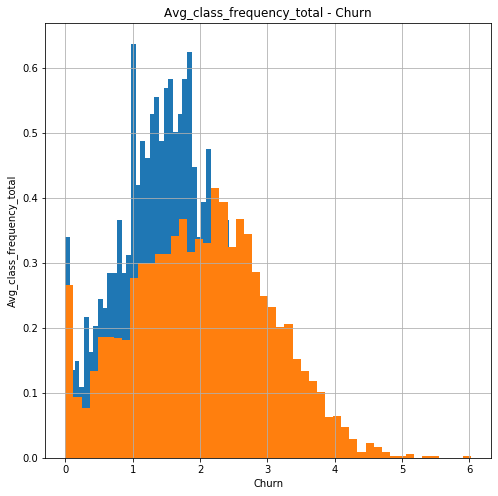

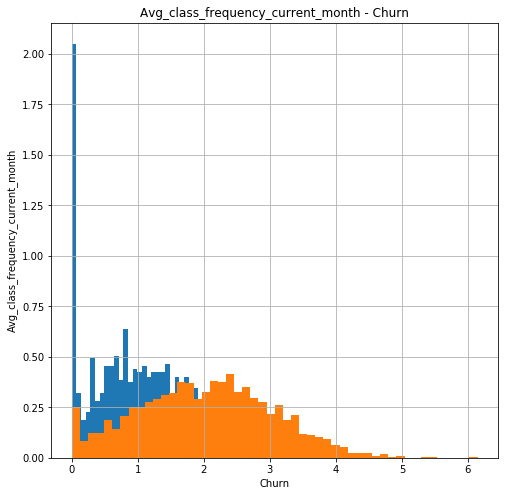

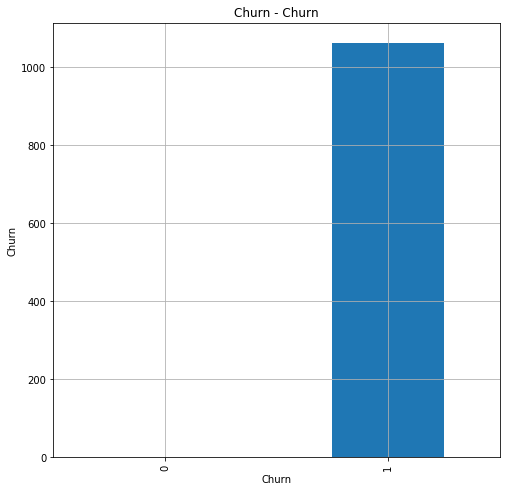

In [7]:
list = ['Contract_period','Age','Avg_additional_charges_total','Month_to_end_contract','Avg_class_frequency_total','Avg_class_frequency_current_month','Lifetime']
for i in df.columns:
    
        if i in list:
            plt.figure(figsize=(8,8))
            df.query('Churn==1')[i].plot(kind='hist', bins=50,grid=True, density=True)
            df.query('Churn==0')[i].plot(kind='hist', bins=50,grid=True, density=True)
            plt.title('{} - Churn'.format(i))
            plt.xlabel('Churn')
            plt.ylabel(i)
            plt.show()
        else:
            plt.figure(figsize=(8,8))
            df.groupby('Churn')[i].sum().plot.bar(grid=True)
            plt.title('{} - Churn'.format(i))
            plt.xlabel('Churn')
            plt.ylabel(i)
            plt.show()

In [ ]:
x = df.query('Churn==1')['Age'].sum()
y = df.query('Churn==0')['Age'].sum()
# Create just a figure and only one subplot

fig, ax = plt.subplots(grid=True)
ax.plot(x,y)
ax.set_title('Simple plot')

In [17]:
x.mean()

26.989632422243165

In [18]:
y.mean()

29.97652262674379

## Матрица корреляции

In [ ]:
cm = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, square = True)
plt.show()

# Модель прогнозирования оттока клиентов

In [ ]:
X = df.drop('Group_visits', axis=1)
y = df['Group_visits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = [
    LogisticRegression(), 
    DecisionTreeClassifier()
    ]
def prediction(a, X_train, y_train, X_test, y_test):
    model = a
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    display(
        'Accuracy:{:.2f}\
         Precision:{:.2f}\
         Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            
        )
    )
for i in models:
    display(i)
    prediction(i,X_train,y_train,X_test,y_test)


После обучения оказалось, что все метрики кроме, recall оказались выше при обучении выборки методом логической регресии

# Кластеризация клиентов

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)
linked = linkage(X_sc,method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Явны выделены 5 кластеров

## Обучении модели кластеризации на основании алгоритма K-Means

In [ ]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc, random_state=0)

In [ ]:
df['cluster'] = labels

## Среднее значение признаков для кластеров

In [ ]:
df.groupby('cluster').mean()

In [ ]:
for i in df.columns:
        if i in list:
            plt.figure(figsize=(8,8))
            df.query('cluster==0')[i].plot(kind='hist', bins=50,grid=True, density=True)
            df.query('cluster==1')[i].plot(kind='hist', bins=50,grid=True, density=True)
            df.query('cluster==2')[i].plot(kind='hist', bins=50,grid=True, density=True)
            df.query('cluster==3')[i].plot(kind='hist', bins=50,grid=True, density=True)
            df.query('cluster==4')[i].plot(kind='hist', bins=50,grid=True, density=True)
            plt.title('{} - cluster'.format(i))
            plt.xlabel('cluster')
            plt.ylabel(i)
            plt.show()
        else:
            plt.figure(figsize=(8,8))
            df.groupby('cluster')[i].sum().plot.bar(grid=True)
            plt.title('{} - cluster'.format(i))
            plt.xlabel('cluster')
            plt.ylabel(i)
            plt.show()

# Выводы и базовые рекомендации по работе с клиентами

Видим, что клиенты из втрого кластера это большая часть людей, которые входят в группу "оттока"

В кластер 0 входят только клиенты, которые продолжили посещять фитнес - центр

Лучше продавать абонементы на посещние больше чем 2 месяцев
Средний возраст тех, кто посещял выше на 3 года. Продавать лучше тем, кто старше 27
Групповые занятия так же посещяют чаще те, кто остался
Так же лучше предлогать доп услуги, так как выручка по доп услугам выше для тех, кто остался